## Общее описание

Итоговая работа должна отвечать следующим требованиям:

Программа реализована на языке программирования Python.
Выполнена загрузка и чтение данных из файлов.
Выполнена предварительная обработка данных (очистка и форматирование данных).
Выполнен разведочный анализ данных EDA.
Определены важные признаки. Выполнен поиск взаимосвязей между признаками.
Выполнено уменьшение размерности массива данных.
Составлена гипотеза о данных и выполнена проверка соответствующей гипотезы.

**Аналитическая задача** -- предложить алгоритм, который будет выдавать оценку склонности клиента к положительному отклику на рекламное предложение по его признаковому описанию. Предполагается, что, получив такую оценку для некоторого множества клиентов, компанию обратиться только к тем из них, которые склонны к отклику.

**Описание данных**
Приведено в файле с исходными данными.

Примерный план по выполнению проекта
Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):

скорректировать заголовки;
скорректировать типы признаков;
проверить наличие дублирующихся записей;
проверить наличие аномальных значений;
восстановить пропущенные значения;

Шаг 3. Провести исследовательский анализ данных:
- исследовать распределения признаков;
- исследовать возможные зависимости между признаками;

Шаг 4. Построить классификационные модели
- построить несколько моделей классификации и сравнить их.

Шаг 5. Проверка гипотез
- сформулировать и проверить гипотезу о склонности к отклику в зависимости от пола клиента

## Подключение необходимых библиотек


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree # дерево решений
from sklearn.ensemble import RandomForestClassifier #случайный лес
from sklearn.linear_model import LogisticRegression # логистическая регресси
from sklearn.svm import SVC # метод опорных векторов
from sklearn.linear_model import SGDClassifier # стохастический градиентный спуск
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans

from scipy import stats as st
import math 

import warnings
warnings.filterwarnings('ignore')

### Просмотр первого листа файла
База имеет явную связь с кредитной сферой (возможно база банка, отдел кредитования)

In [2]:
df_col = pd.read_excel('data_set.xlsx', sheet_name=0)
df_col

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


### Просмотр второго листа файла

In [3]:
df = pd.read_excel('data_set.xlsx', sheet_name=1)
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580.000000,1580.0,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020.000000,4020.0,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0.000000,0.0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,1589.923333,1590.0,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,1152.150000,2230.0,NaN


## Исследование датафрейма

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

In [5]:
df.nunique()

AGREEMENT_RK                  15223
TARGET                            2
AGE                              47
SOCSTATUS_WORK_FL                 2
SOCSTATUS_PENS_FL                 2
GENDER                            2
CHILD_TOTAL                      10
DEPENDANTS                        8
EDUCATION                         7
MARITAL_STATUS                    5
GEN_INDUSTRY                     31
GEN_TITLE                        12
ORG_TP_STATE                      5
ORG_TP_FCAPITAL                   2
JOB_DIR                          10
FAMILY_INCOME                     5
PERSONAL_INCOME                 274
REG_ADDRESS_PROVINCE             81
FACT_ADDRESS_PROVINCE            81
POSTAL_ADDRESS_PROVINCE          80
TP_PROVINCE                      70
REGION_NM                        11
REG_FACT_FL                       2
FACT_POST_FL                      2
REG_POST_FL                       2
REG_FACT_POST_FL                  2
REG_FACT_POST_TP_FL               2
FL_PRESENCE_FL              

### ищем дубли

In [6]:
print('Количество дублирующихся записей -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.duplicated().sum(), df.duplicated().sum()/df.shape[0]))

Количество дублирующихся записей -- 0. Это составляет -- 0.00% от общего числа записей.


In [7]:
print('Количество дублирующихся записей без идентификатора -- {}. Это составляет -- {:.2%} от общего числа записей.'.
      format(df.drop('AGREEMENT_RK', axis=1).duplicated().sum(), 
             df.drop('AGREEMENT_RK', axis=1).duplicated().sum()/df.drop('AGREEMENT_RK', axis=1).shape[0]))

Количество дублирующихся записей без идентификатора -- 0. Это составляет -- 0.00% от общего числа записей.


#### Заменим пропуски PREVIOUS_CARD_NUM_UTILIZED на 0, т.к. это указано в первом листе и WORK_TIME на 0, т.к. предположительно эти пользователи не работают

In [8]:
df[['PREVIOUS_CARD_NUM_UTILIZED', 'WORK_TIME']] = df[['PREVIOUS_CARD_NUM_UTILIZED', 'WORK_TIME']].fillna(0)

### смотрим перцентили и видим много категориальных данных

In [9]:
perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.95, 0.99]
df.describe(percentiles=perc)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
count,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,...,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,6.540183e+07,0.119030,40.406096,0.909610,0.134468,0.654536,1.099389,0.645208,13853.836323,0.838534,...,0.054786,0.910136,1.387769,0.751889,7.875977,0.195362,0.130198,239.457144,243.021626,0.019050
std,4.568181e+06,0.323835,11.601068,0.286748,0.341165,0.475535,0.995411,0.812252,9015.467617,0.367973,...,0.227569,0.285996,0.793566,0.988499,7.955747,0.685022,0.355702,827.700432,836.100116,0.137663
min,5.991015e+07,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,5.992792e+07,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4300.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,6.010312e+07,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.192092e+07,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.437100e+07,0.000000,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.708802e+07,0.000000,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,1.000000,...,0.000000,1.000000,2.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
80%,6.732669e+07,0.000000,52.000000,1.000000,0.000000,1.000000,2.000000,1.000000,18000.000000,1.000000,...,0.000000,1.000000,2.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### проведем анализ категориальных признаков: менее трех переменных

In [10]:
cat_var_duo = ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'ORG_TP_FCAPITAL', 
               'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 
               'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 
               'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL', 'GPF_DOCUMENT_FL', 
               'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'PREVIOUS_CARD_NUM_UTILIZED']

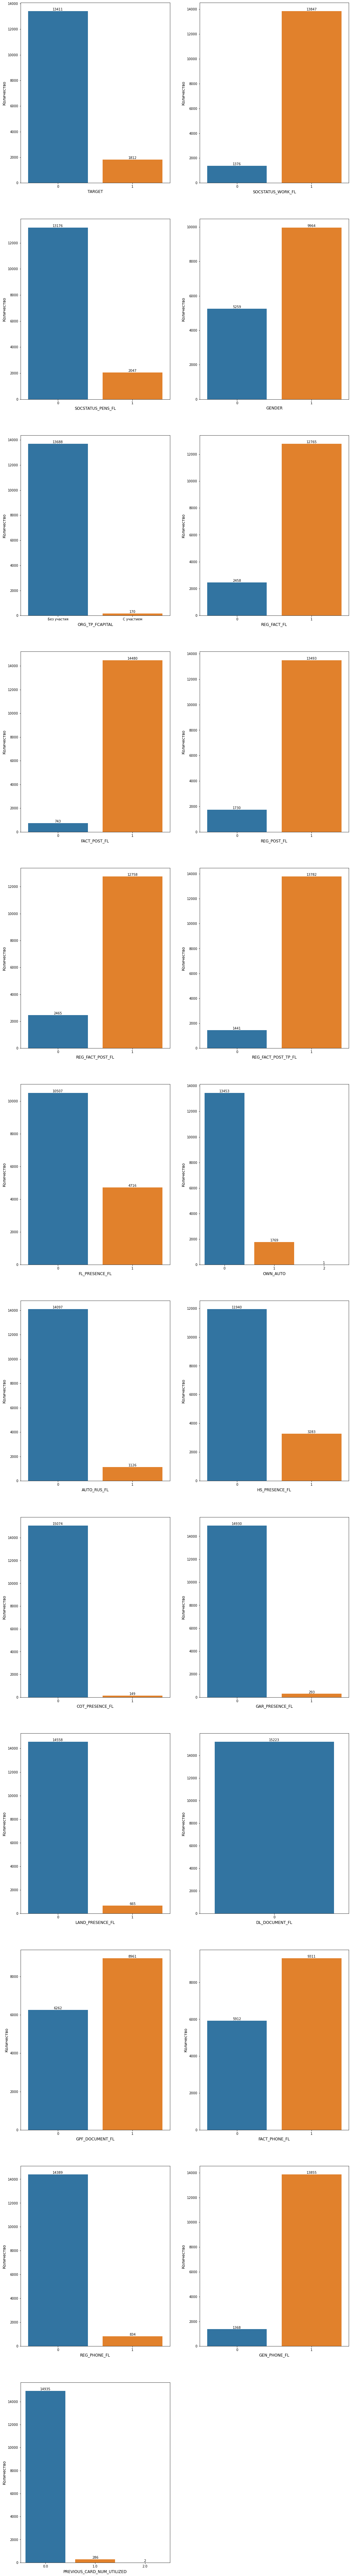

In [11]:
fig, axes = plt.subplots(3, sharey=True, figsize=(18,144))
i=0
for i, col in enumerate(cat_var_duo):
    plt.subplot(12,2,i+1)
    ax = sns.countplot(x=col, data=df,)
    #plt.title("Гистограмма для {}".format(col))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

### Промежуточный вывод: 
- Менее 15% пльзователей откликнулось на маркетинговую кампанию
- Некоторые столбцы имеют очень маленькое (менее 5%) со|отношение признаков: 
        например ORG_TP_FCAPITAL (без участия - 13688, с участием - 170). 
        DL_DOCUMENT_FL имеет вообще всего 1 признак. 
        PREVIOUS_CARD_NUM_UTILIZED имеет 2 значения 2. 
        OWN_AUTO имеет 1 значение 2. 
- Предлагаю эти признаки не рассматривать: 
- ORG_TP_FCAPITAL, FACT_POST_FL, COT_PRESENCE_FL, GAR_PRESENCE_FL, LAND_PRESENCE_FL, DL_DOCUMENT_FL. 
- В PREVIOUS_CARD_NUM_UTILIZED и OWN_AUTO исключить строки со значением 2.
- REG_FACT_FL, REG_POST_FL, REG_FACT_POST_FL, REG_FACT_POST_TP_FL тоже удалим

In [12]:
df.drop(columns = ['ORG_TP_FCAPITAL', 'FACT_POST_FL', 'COT_PRESENCE_FL', 
                   'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'DL_DOCUMENT_FL', 
                   'REG_FACT_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL'], inplace = True)

df = df[(df.OWN_AUTO < 2) & (df.PREVIOUS_CARD_NUM_UTILIZED < 2)]

### проведем анализ категориальных признаков: более двух переменных

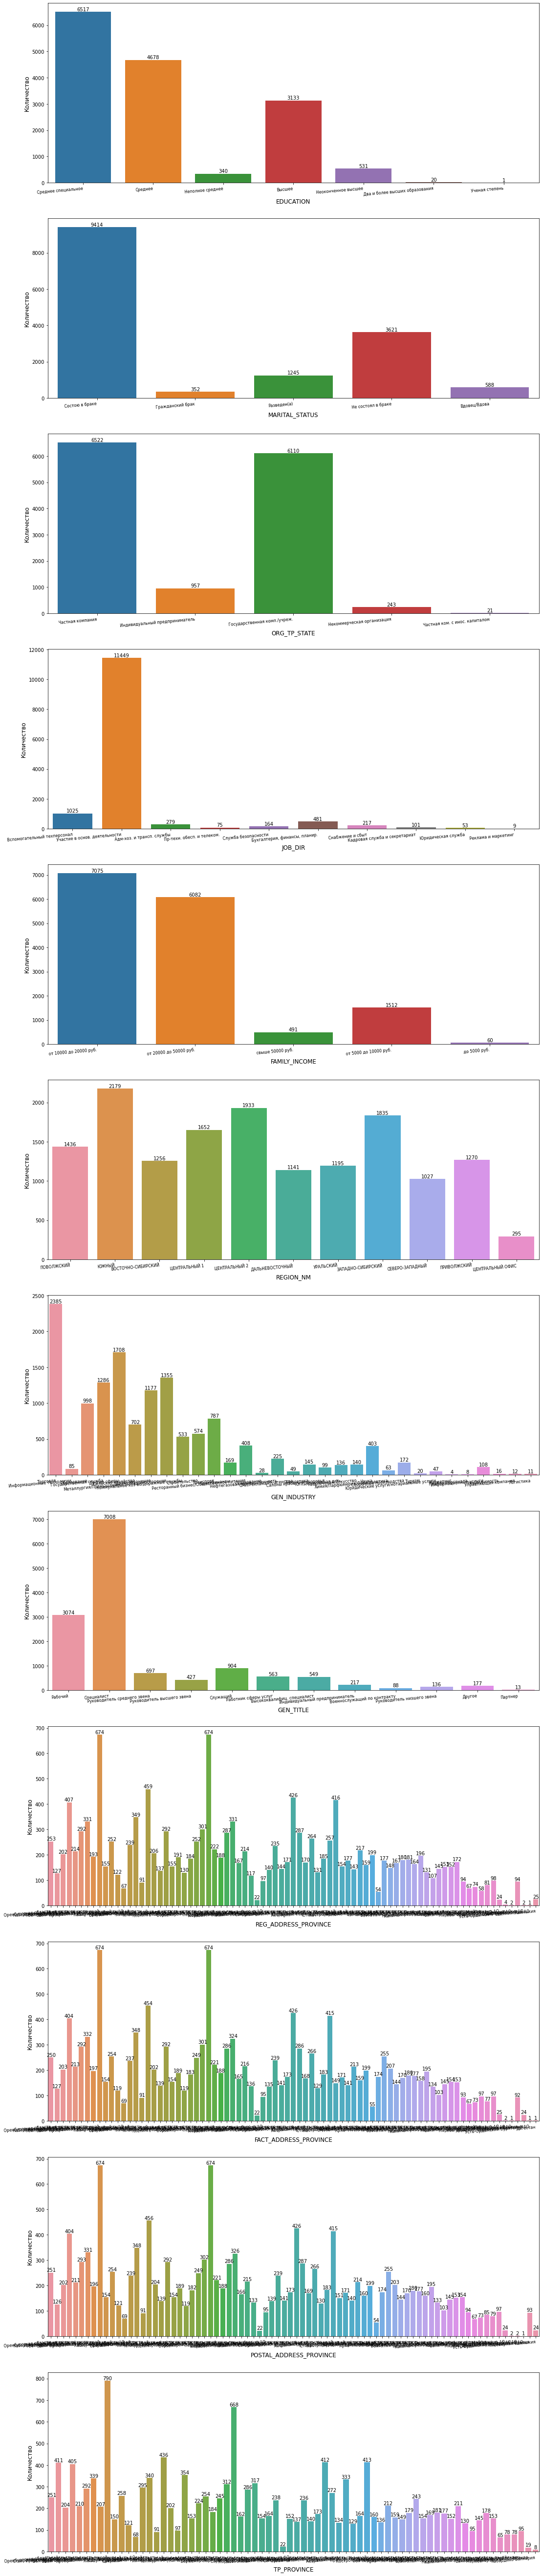

In [13]:
cat_var_more = ['EDUCATION', 'MARITAL_STATUS', 'ORG_TP_STATE', 'JOB_DIR', 'FAMILY_INCOME', 
                'REGION_NM', 'GEN_INDUSTRY', 'GEN_TITLE', 'REG_ADDRESS_PROVINCE', 
                'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE']
fig, axes = plt.subplots(3, sharey=True, figsize=(18,96))
i=0
for i, col in enumerate(cat_var_more):
    plt.subplot(12,1,i+1)
    ax = sns.countplot(x=col, data=df,)
    #plt.title("Гистограмма для {}".format(col))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 5, ha = "right", fontsize = 8);
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y), ha='center', va='bottom', fontsize = 10)

### Промежуточный вывод: 
- Предположительно основная часть пользоваелей это люди имеющие Среднее или Специальное образование, состоящие в браке, работающие в частной или государственной компании, зарабатывающие от 10000 до 50000 рублей.
- Предлагаю удалить признаки, имеющие слишком много значений: JOB_DIR, GEN_INDUSTRY, GEN_TITLE, REG_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, TP_PROVINCE и ORG_TP_STATE (имеет много пропусков)
- Оставшиеся признаки приобразуем в числовые

In [14]:
df.drop(columns = ['JOB_DIR', 'GEN_INDUSTRY', 'GEN_TITLE', 'REG_ADDRESS_PROVINCE', 'ORG_TP_STATE', 
                   'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE'], inplace = True)

### исключаем категориальные данные для удобства просмотра
СТРАННО! AGREEMENT_RK, FACT_LIVING_TERM, WORK_TIME почему так отображаются?


In [15]:
perc = [0.01, 0.05, 0.25, 0.5, 0.75, 0.8, 0.95, 0.99, 0.999]
df.drop(['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'FL_PRESENCE_FL', 
         'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 
         'REG_PHONE_FL', 'GEN_PHONE_FL', 'PREVIOUS_CARD_NUM_UTILIZED', 'EDUCATION', 'MARITAL_STATUS', 
         'FAMILY_INCOME', 'REGION_NM'], axis=1).describe(percentiles=perc)

,AGREEMENT_RK,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT
count,1.522000e+04,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,1.522000e+04,1.522000e+04,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000,15220.000000
mean,6.540088e+07,40.408213,1.099474,0.645204,13854.070325,14662.504015,8.098817,3395.674461,3.039925e+03,2.659893e+02,1.387582,0.751643,7.874770,0.195401,0.130223,239.504343,243.069528
std,4.567222e+06,11.600912,0.995403,0.812224,9016.163404,12129.934424,4.088091,5145.132875,2.624813e+05,2.324667e+04,0.793340,0.988375,7.955017,0.685084,0.355732,827.775179,836.175556
min,5.991015e+07,21.000000,0.000000,0.000000,24.000000,2000.000000,3.000000,0.000000,-2.600000e+01,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1%,5.992792e+07,22.000000,0.000000,0.000000,4300.000000,2498.190000,3.000000,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
5%,6.010308e+07,24.000000,0.000000,0.000000,5000.000000,3500.000000,3.000000,0.000000,7.000000e+00,0.000000e+00,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,6.192092e+07,30.000000,0.000000,0.000000,8000.000000,6500.000000,6.000000,1000.000000,4.100000e+01,1.400000e+01,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,6.437098e+07,39.000000,1.000000,0.000000,12000.000000,11550.000000,6.000000,2000.000000,1.080000e+02,4.000000e+01,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,6.708792e+07,50.000000,2.000000,1.000000,17000.000000,19170.000000,10.000000,4000.000000,2.040000e+02,9.600000e+01,2.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
80%,6.732667e+07,52.000000,2.000000,1.000000,18000.000000,21216.400000,12.000000,5000.000000,2.280000e+02,1.200000e+02,2.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000


### удалим отрицательное значение в FACT_LIVING_TERM

In [16]:
df = df[(df.FACT_LIVING_TERM >= 0)]

### преобразуем object столбцы

In [17]:
df = pd.get_dummies(df)
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,FL_PRESENCE_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,59910150,0,49,1,0,1,2,1,5000.0,0,...,0,0,1,0,0,0,0,0,0,0
1,59910230,0,32,1,0,1,3,3,12000.0,0,...,0,0,0,0,0,0,0,0,0,1
2,59910525,0,52,1,0,1,4,0,9000.0,0,...,0,0,0,0,0,0,0,0,0,0
3,59910803,0,39,1,0,1,1,1,25000.0,1,...,0,0,0,0,0,0,0,0,0,1
4,59911781,0,30,1,0,0,0,0,12000.0,0,...,0,0,0,0,0,0,0,0,0,1


### удалим оставшиеся пропуски

In [18]:
old_row_count = df.shape[0]
df.dropna(inplace = True)
new_row_count = df.shape[0]
print('Удалено {:.2%} данных'.format((old_row_count - new_row_count)/old_row_count))

Удалено 0.00% данных


### проведем анализ интервальных признаков

In [19]:
int_var = ['AGE', 'CHILD_TOTAL', 'DEPENDANTS', 'PERSONAL_INCOME', 'CREDIT', 'TERM', 'FST_PAYMENT', 
           'FACT_LIVING_TERM', 'WORK_TIME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 
           'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']

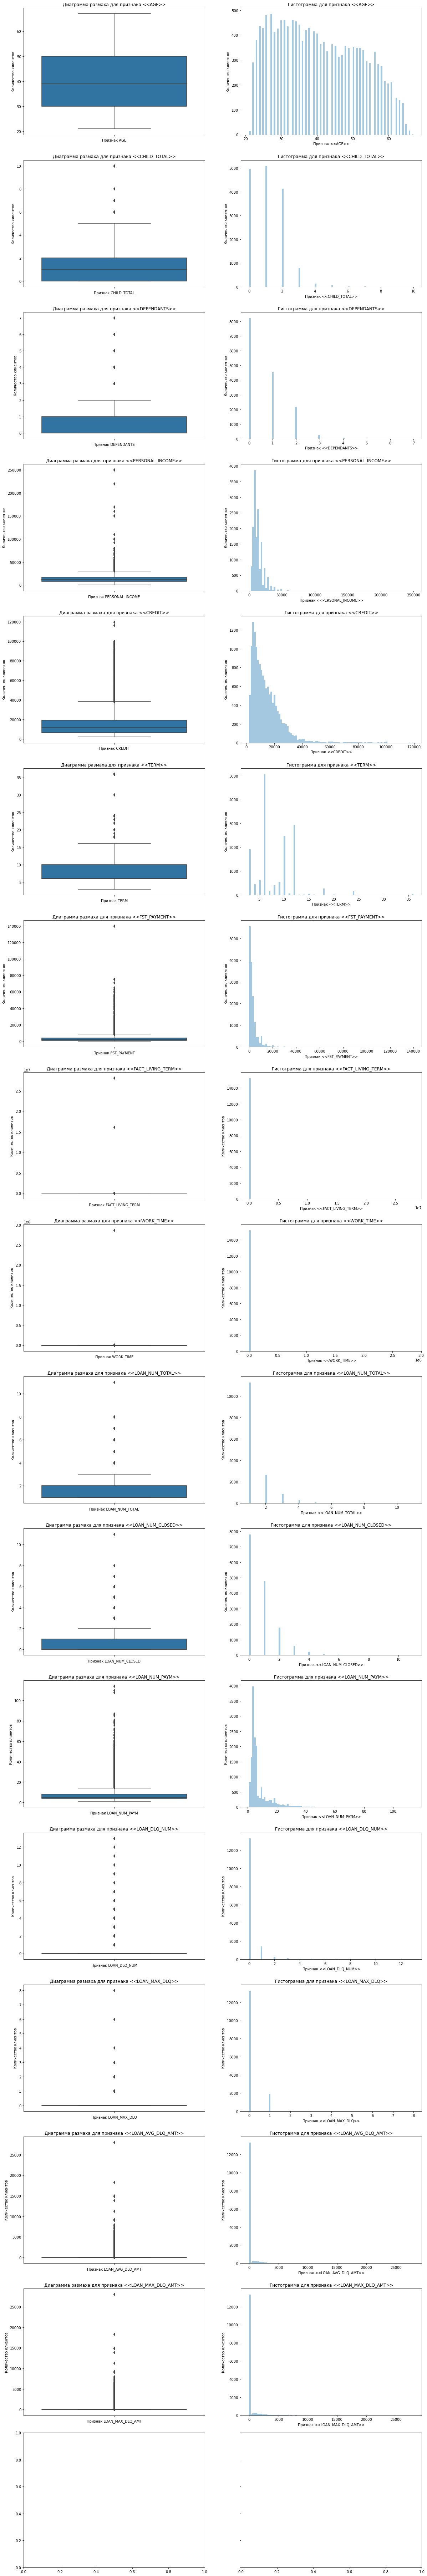

In [20]:
fig, axes = plt.subplots(16,2, sharey=True, figsize=(20,132))
i=0
j=1
for i, col in enumerate(int_var):
    plt.subplot(17,2,j)
    ax = sns.boxplot(y = df[col])
    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel('Признак {}'.format(col))
    ax.set_title('Диаграмма размаха для признака <<{}>>'.format(col))
    plt.subplot(17,2,j+1)
    ax = sns.distplot(x = df[col], kde = False, bins = 100)
    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel('Признак <<{}>>'.format(col))
    ax.set_title('Гистограмма для признака <<{}>>'.format(col)) 
    j+=2     

In [21]:
lst_tuple_wisk = list()
lst_min = list()
lst_max = list()
for col in int_var:
    Q1, median, Q3 = np.percentile(np.asarray(df[col]), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df[col]) <= hival, np.asarray(df[col]))
    wisklo = np.compress(np.asarray(df[col]) >= loval, np.asarray(df[col]))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    lst_tuple_wisk.append((actual_loval, actual_hival))
    lst_min.append(df[df[col] < actual_loval].shape[0])
    lst_max.append(df[df[col] > actual_loval].shape[0])

In [22]:
dict_to_df = {'wisk': lst_tuple_wisk,
              'count_small_an' : lst_min,
              'count_big_an' : lst_max
              }
df_temp = pd.DataFrame(data = dict_to_df, 
                     index = int_var)
df_temp

,wisk,count_small_an,count_big_an
AGE,"(21, 67)",0,15206
CHILD_TOTAL,"(0, 5)",0,10238
DEPENDANTS,"(0, 2)",0,6996
PERSONAL_INCOME,"(24.0, 30000.0)",0,15218
CREDIT,"(2000.0, 38120.0)",0,15192
TERM,"(3, 16)",0,13300
FST_PAYMENT,"(0.0, 8500.0)",0,14011
FACT_LIVING_TERM,"(0, 445)",0,15199
WORK_TIME,"(0.0, 219.0)",0,13851
LOAN_NUM_TOTAL,"(1, 3)",0,3933



#### т.к. у LOAN_DLQ_NUM, LOAN_MAX_DLQ, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT нормальные значения 0 удалим эти признаки
#### удаим AGREEMENT_RK, он нам не понадобится

In [23]:
df.drop(columns = ['LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 
                   'LOAN_MAX_DLQ_AMT', 'AGREEMENT_RK'], inplace = True)

#### создадим новый датафрейм удалив все аномальные значения

In [24]:
df_clients = df[(((df.AGE >= 21) & (df.AGE <= 67)) & 
                 (df.CHILD_TOTAL <= 5) & 
                 (df.DEPENDANTS <= 2) & 
                 ((df.PERSONAL_INCOME >= 24) & (df.PERSONAL_INCOME <= 30000)) & 
                 ((df.CREDIT >= 2000) & (df.CREDIT <= 38120)) & 
                 ((df.TERM >= 3) & (df.TERM <= 16)) & 
                 (df.FST_PAYMENT <= 8500) & 
                 (df.FACT_LIVING_TERM <= 445) & 
                 (df.WORK_TIME <= 219) & 
                 ((df.LOAN_NUM_TOTAL >= 1) & (df.LOAN_NUM_TOTAL <= 3)) & 
                 (df.LOAN_NUM_CLOSED <= 2) & 
                 ((df.LOAN_NUM_PAYM >= 1) & (df.LOAN_NUM_PAYM <= 14)))]

In [25]:
sh_old = df.shape[0]
sh_new = df_clients.shape[0]
print('Количество аномальных наблюдений {:d}, что составляет {:.2%} от общего числа записей.'
      .format(sh_old-sh_new, (sh_old-sh_new)/sh_old))

Количество аномальных наблюдений 5347, что составляет 35.13% от общего числа записей.


### Количество аномальных записей велико и хорошо было бы их изучить тоже, но у нас достаточно оставшихся записей для дальнейшей работы.

In [26]:
df_clients.shape[0]

9872

#### корректируем заголовки признаков 
(можно было раньше это сделать)

In [27]:
dict_rename_columns = {
'TARGET' : 'target',
'AGE' : 'age', 
'SOCSTATUS_WORK_FL' : 'work',
'SOCSTATUS_PENS_FL' : 'pensioner', 
'GENDER' : 'gender',
'CHILD_TOTAL' : 'child', 
'DEPENDANTS' : 'dependants', 
'PERSONAL_INCOME' : 'income',
'REG_FACT_FL' : 'reg_fact_adr',
'FL_PRESENCE_FL': 'flat',    
'OWN_AUTO' : 'auto', 
'AUTO_RUS_FL' : 'rus_auto',
'HS_PRESENCE_FL' : 'house', 
'COT_PRESENCE_FL' : 'cottage',
'GAR_PRESENCE_FL' : 'garage', 
'LAND_PRESENCE_FL' : 'land',
'CREDIT' : 'credit_sum', 
'TERM' : 'credit_time', 
'FST_PAYMENT' : 'first_pay',
'GPF_DOCUMENT_FL' : 'gpf_document',
'FACT_LIVING_TERM': 'living_time',
'WORK_TIME' : 'work_time', 
'FACT_PHONE_FL' : 'fact_phone',
'REG_PHONE_FL' : 'reg_phone', 
'GEN_PHONE_FL' : 'work_phone',
'LOAN_NUM_TOTAL' : 'credit_total', 
'LOAN_NUM_CLOSED' : 'credit_close',
'LOAN_NUM_PAYM' : 'payment_total', 
'LOAN_DLQ_NUM' : 'delay_total', 
'LOAN_MAX_DLQ' : 'max_delay_num',
'LOAN_AVG_DLQ_AMT': 'avg_delay_sum',    
'LOAN_MAX_DLQ_AMT' : 'max_delay_sum', 
'PREVIOUS_CARD_NUM_UTILIZED' : 'prev_card',

'EDUCATION_Высшее' : 'edu_high', 
'EDUCATION_Два и более высших образования' : 'edu_high_more',
'EDUCATION_Неоконченное высшее' : 'edu_high_incomplete', 
'EDUCATION_Неполное среднее' : 'edu_sec_incomplete',
'EDUCATION_Среднее' : 'edu_sec', 
'EDUCATION_Среднее специальное' : 'edu_special', 
'EDUCATION_Ученая степень' : 'edu_academic',

'MARITAL_STATUS_Вдовец/Вдова' : 'widow', 
'MARITAL_STATUS_Гражданский брак' : 'civil_married',
'MARITAL_STATUS_Не состоял в браке' : 'not_married', 
'MARITAL_STATUS_Разведен(а)' : 'divorced',
'MARITAL_STATUS_Состою в браке' : 'married', 

'FAMILY_INCOME_до 5000 руб.' : 'income_total_verylow', 
'FAMILY_INCOME_от 5000 до 10000 руб.' : 'income_total_low',
'FAMILY_INCOME_от 10000 до 20000 руб.' : 'income_total_middle',
'FAMILY_INCOME_от 20000 до 50000 руб.' : 'income_total_high', 
'FAMILY_INCOME_свыше 50000 руб.' : 'income_total_veryhigh',
    
'REGION_NM_ВОСТОЧНО-СИБИРСКИЙ' : 'reg_eastsiberian', 
'REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ' : 'reg_fareastern',
'REGION_NM_ЗАПАДНО-СИБИРСКИЙ' : 'reg_westsiberian', 
'REGION_NM_ПОВОЛЖСКИЙ' : 'reg_povolzhsky',
'REGION_NM_ПРИВОЛЖСКИЙ' : 'reg_privolzhsky', 
'REGION_NM_СЕВЕРО-ЗАПАДНЫЙ' : 'reg_northwestern', 
'REGION_NM_УРАЛЬСКИЙ' : 'reg_uralsky',
'REGION_NM_ЦЕНТРАЛЬНЫЙ 1' : 'reg_central_one', 
'REGION_NM_ЦЕНТРАЛЬНЫЙ 2' : 'reg_central_two',
'REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС' : 'reg_central_office', 
'REGION_NM_ЮЖНЫЙ' : 'reg_southern'}

df_clients.rename(columns = dict_rename_columns, 
          inplace = True)

In [28]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9872 entries, 2 to 15222
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   target                 9872 non-null   int64  
 1   age                    9872 non-null   int64  
 2   work                   9872 non-null   int64  
 3   pensioner              9872 non-null   int64  
 4   gender                 9872 non-null   int64  
 5   child                  9872 non-null   int64  
 6   dependants             9872 non-null   int64  
 7   income                 9872 non-null   float64
 8   flat                   9872 non-null   int64  
 9   auto                   9872 non-null   int64  
 10  rus_auto               9872 non-null   int64  
 11  house                  9872 non-null   int64  
 12  credit_sum             9872 non-null   float64
 13  credit_time            9872 non-null   int64  
 14  first_pay              9872 non-null   float64
 15  gpf

# Есть гипотезы!
- #### 1. Есть предположение, что между целевым признаком и возрастом есть закономерность
- #### 2. Имеется статистически значимое различие между полом клиентов откликнувшихся и не откликнувшихся
- #### 3. Заработок влияет на отношение к определенной группе.

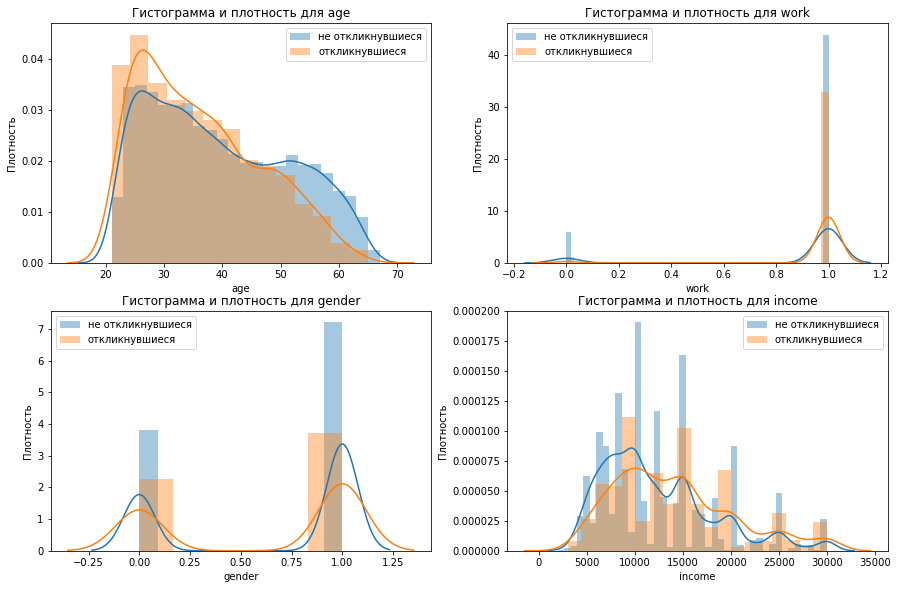

In [29]:
fig, axes = plt.subplots(2, 2, sharey=True, figsize=(15,15))
i=0
for i, col in enumerate(df_clients[['age', 'work', 'gender', 'income']]):
    plt.subplot(3,2,i+1)
    ax = sns.distplot(df_clients[df_clients.target == 0][col], label = 'не откликнувшиеся', )
    ax = sns.distplot(df_clients[df_clients.target == 1][col], label = 'откликнувшиеся')
    plt.title("Гистограмма и плотность для {}".format(col))
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend()

#### на гистограмме плотности особо значимых различий не видно
#### изучим интервальные признаки по группам

In [30]:
df_mean = df_clients.groupby('target')[df_clients.columns].agg('mean').T
df_median = df_clients.groupby('target')[df_clients.columns].agg('median').T
df_temp = pd.concat([df_mean, df_median], axis = 1)
df_temp.columns = ['среднее_для_НЕ_откликнувшихся',
                   'среднее_для_откликнувшихся',
                  'Медиана_для_НЕ_откликнувшихся',
                  'Медиана_для_откликнувшихся'] 
df_temp

,среднее_для_НЕ_откликнувшихся,среднее_для_откликнувшихся,Медиана_для_НЕ_откликнувшихся,Медиана_для_откликнувшихся
target,0.000000,1.000000,0.0,1.0
age,39.510341,36.179951,38.0,34.0
work,0.879954,0.966311,1.0,1.0
pensioner,0.151704,0.057518,0.0,0.0
gender,0.654997,0.621200,1.0,1.0
child,1.017909,0.985210,1.0,1.0
dependants,0.593183,0.655711,0.0,0.0
income,12278.245660,13982.523418,10900.0,13000.0
flat,0.279723,0.276089,0.0,0.0
auto,0.098325,0.105177,0.0,0.0


## Промежуточный вывод: Проведем предварительный анализ рассчитанных статистик по каждому признаку:
- #### 1. по признаку age наблюдаются различия. Видим, что клиенты в возрасте 38-40 лет более склонны не откликаться, нежели клиенты в возрасте 34-36 лет;
- #### 2. по признаку income наблюдаются различия. Люди с меньшим заработком более склонны не откликаться. 
- #### 3. по признаку gender различий нет.

In [31]:
df_clients_short = df_clients[['target', 'age', 'work', 'pensioner', 'gender', 'child', 'dependants',
                                'income', 'flat', 'auto', 'rus_auto', 'house', 'credit_sum', 
                                'credit_time', 'first_pay', 'gpf_document', 'living_time', 'work_time', 
                                'fact_phone', 'reg_phone', 'work_phone', 'credit_total', 'credit_close', 
                                'payment_total', 'prev_card']]

- уменьшим датафрейм, чтоб удобней было строить матрицу
- построим матрицу корреляций
- видим, что наша целевая переменная target не имеет существенного положительного коэффициента корреляции с другими признаками

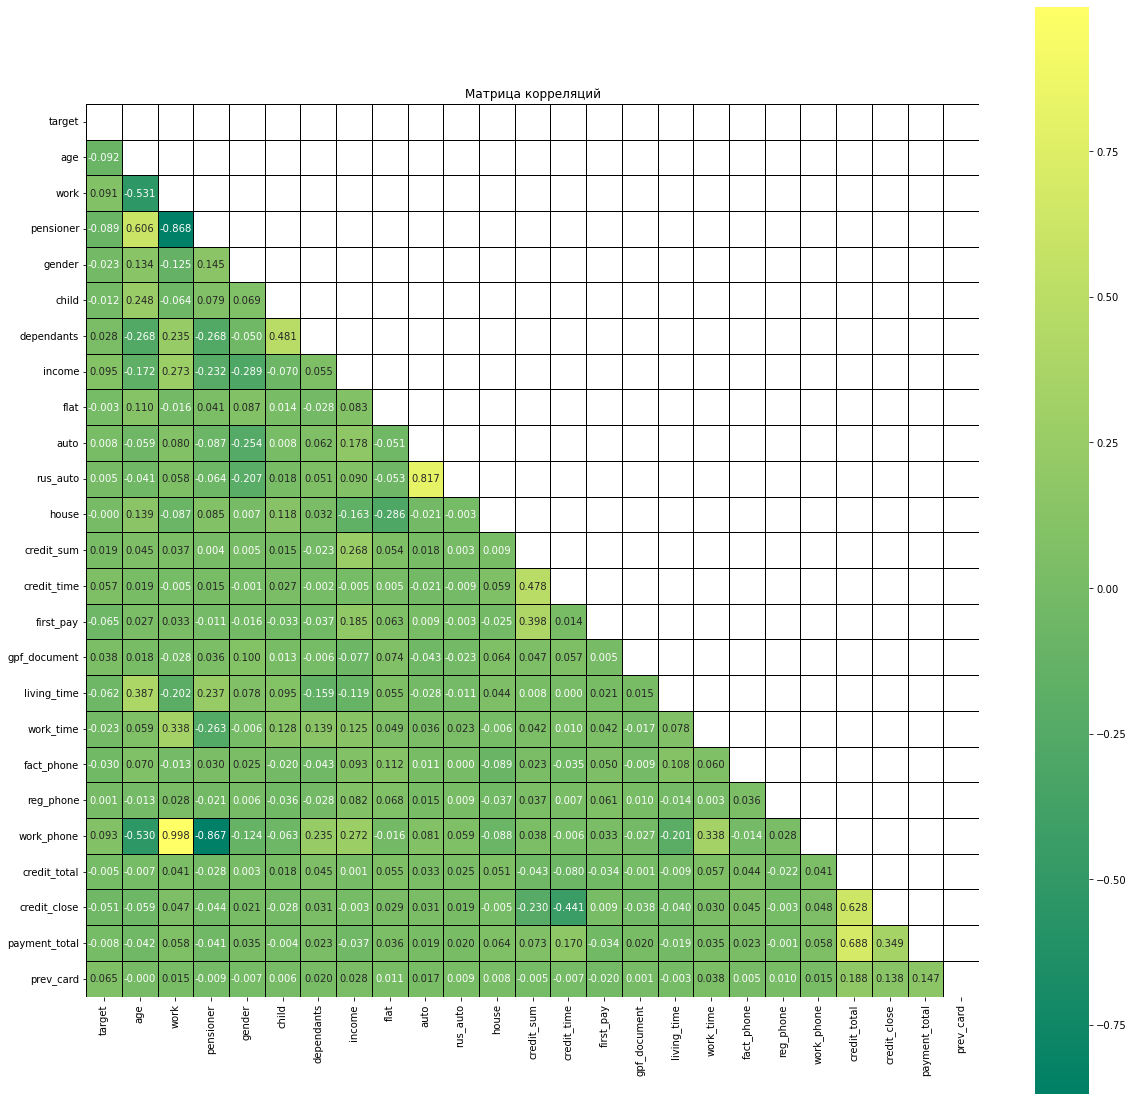

In [32]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(data = df_clients_short.corr(), annot=True, square=True, 
            cmap='summer', fmt='.3f', linewidths=1, linecolor='black', mask=np.triu(df_clients_short.corr()))
plt.title('Матрица корреляций')
plt.show()

### выборка сбалансирована (размер классов отличается не в 10 раз)

In [33]:
df_clients.groupby('target')['target'].agg('count')/df_clients.shape[0]*100

target
0    87.672204
1    12.327796
Name: target, dtype: float64

##### разбиваем на обучающую и тестовую выборку, нормализируем, оцениваем, обучаем, трансформируем

In [34]:
X = df_clients.drop(['target'], axis = 1)
y = df_clients['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

##### классифицируем, прогнозируем и оцениваем качество

In [35]:
# Деревья решений
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train_st, y_train)
dt_y_pred = dt.predict(X_test_st)
# Случайный лес 
rnd = RandomForestClassifier(random_state=42)
rnd.fit(X_train_st, y_train)
rnd_y_pred = rnd.predict(X_test_st)
# Логистическая регрессия
lr = LogisticRegression(random_state=42)
lr.fit(X_train_st, y_train)
lr_y_pred = lr.predict(X_test_st)
# Метод опорных векторов
svc = SVC(random_state=42)
svc.fit(X_train_st, y_train)
svc_y_pred = svc.predict(X_test_st)

#### проверяем несколько моделей
по моему мнению модель 'Логистическая регрессия' показывает наилучший результат!

In [36]:
print("Оценка модели обучения 'Деревья решений'".format(accuracy_score(y_test, dt_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, dt_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, dt_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, dt_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, dt_y_pred)))
print('------------------------------------------------')
print("Оценка модели обучения 'Случайный лес'".format(accuracy_score(y_test, rnd_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, rnd_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, rnd_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, rnd_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, rnd_y_pred)))
print('------------------------------------------------')
print("Оценка модели обучения 'Логистическая регрессия'".format(accuracy_score(y_test, lr_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, lr_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, lr_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, lr_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, lr_y_pred)))
print('------------------------------------------------')
print("Оценка модели обучения 'Метод опорных векторов'".format(accuracy_score(y_test, svc_y_pred)))
print("Аккуратность (accuracy) = {}".format(accuracy_score(y_test, svc_y_pred)))
print("Точность (precision) = {}".format(precision_score(y_test, svc_y_pred)))
print("Полнота (recall) = {}".format(recall_score(y_test, svc_y_pred)))
print("F-мера (f-score) = {}".format(f1_score(y_test, svc_y_pred)))

Оценка модели обучения 'Деревья решений'
Аккуратность (accuracy) = 0.7660759493670886
Точность (precision) = 0.1525974025974026
Полнота (recall) = 0.18951612903225806
F-мера (f-score) = 0.16906474820143885
------------------------------------------------
Оценка модели обучения 'Случайный лес'
Аккуратность (accuracy) = 0.8744303797468355
Точность (precision) = 0.0
Полнота (recall) = 0.0
F-мера (f-score) = 0.0
------------------------------------------------
Оценка модели обучения 'Логистическая регрессия'
Аккуратность (accuracy) = 0.8739240506329113
Точность (precision) = 0.3333333333333333
Полнота (recall) = 0.004032258064516129
F-мера (f-score) = 0.00796812749003984
------------------------------------------------
Оценка модели обучения 'Метод опорных векторов'
Аккуратность (accuracy) = 0.8744303797468355
Точность (precision) = 0.0
Полнота (recall) = 0.0
F-мера (f-score) = 0.0


In [37]:
grid_searcher = GridSearchCV(
    LogisticRegression(max_iter=3000, random_state=42, solver = 'liblinear'), 
    param_grid={
        'C': [0.01, 0.1, 0.5, 1, 10, 50],
        'penalty' : ['l1', 'l2']
    },
    scoring='accuracy',
    cv=5
)
grid_searcher.fit(X_train_st, y_train);
grid_searcher.best_params_

{'C': 0.01, 'penalty': 'l1'}

In [38]:
lr = LogisticRegression(random_state=42, max_iter=3000, solver = 'liblinear', C=0.01, penalty = 'l1')
lr.fit(X_train_st, y_train)
y_pred = lr.predict(X_test_st)
lr_metrix = pd.Series([accuracy_score(y_test, y_pred), 
                       precision_score(y_test, y_pred),
                      recall_score(y_test, y_pred)],
                      ['Accuracy', 'Precision', 'Recall'])
lr_imp_var = pd.DataFrame({'feature':X_train.columns, 'coeff':lr.coef_.tolist()[0]}, )
lr_imp_var['coeff'] = lr_imp_var['coeff'].apply(abs)
lr_imp_var.sort_values(by = 'coeff', ascending = False, inplace = True)
lr_metrix

Accuracy     0.87443
Precision    0.00000
Recall       0.00000
dtype: float64

#### смотрим важность признаков

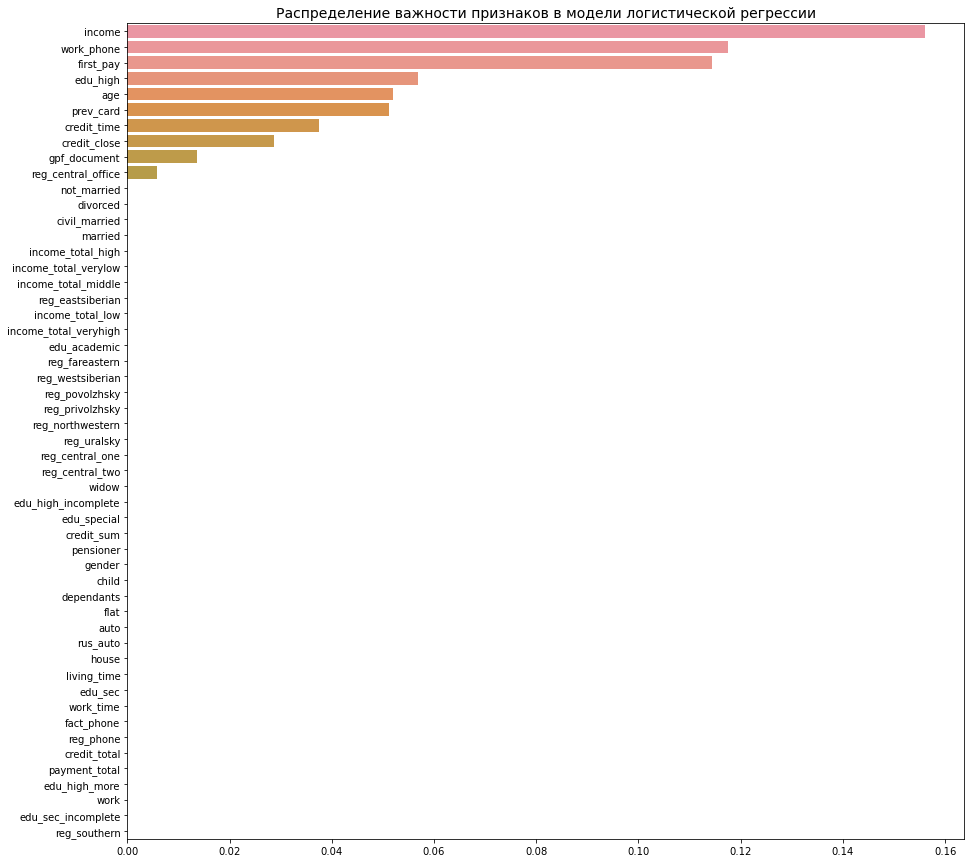

In [39]:
y_label = lr_imp_var['feature'].to_list()
fig, ax = plt.subplots(figsize = (15,15))
ax = sns.barplot(x='coeff', y='feature', data = lr_imp_var)
ax.get_yticklabels(y_label)
ax.set_title('Распределение важности признаков в модели логистической регрессии',fontsize = 14)
plt.xlabel('',fontsize = 12)
plt.ylabel('', fontsize = 12);

## Промежуточный вывод по важности коэффициентов при признаках в логрегрессии: 
#### - Самым важным признаком влияющим на целевую переменную оказался Личный доход (income). Неожиданно!
#### - Так же важными оказались: work_phone, first_pay, edu_high.
#### - age как и предполагалось тоже оказыват влияние.
#### - а вот признак gender не оказывает влияние на отклики!!!

#### Поскольку нас интересуют, прежде всего, клиенты склонные к откликам, выполним их кластеризацию
- воспользуемся методом ward

In [40]:
df_clients_target = df_clients[df_clients.target == 1]
X = df_clients_target.drop(['target'], axis = 1)
scaler = StandardScaler()
df_fit = scaler.fit_transform(X)

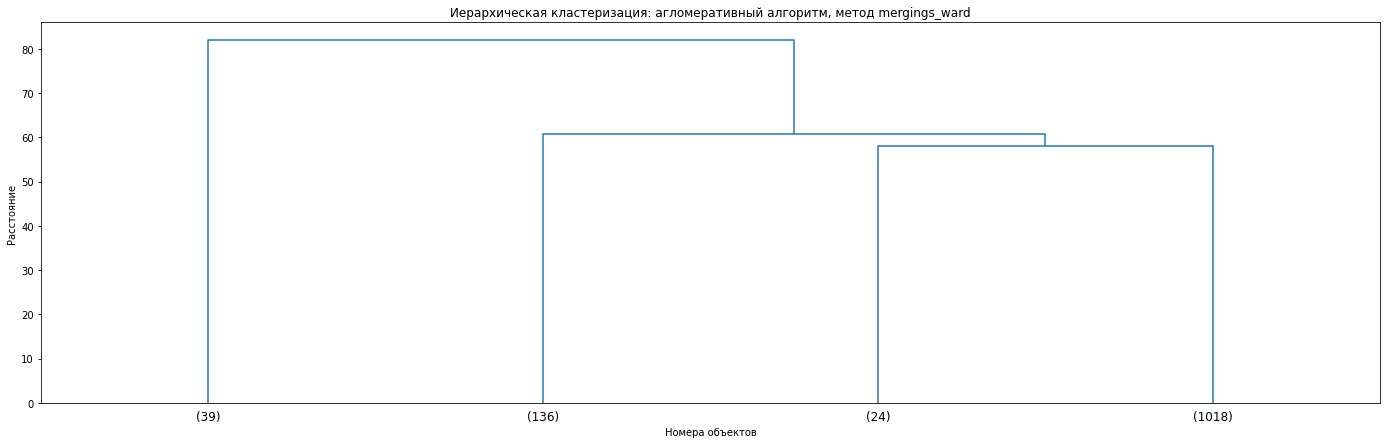

In [41]:

plt.figure(figsize=(24,7))
Z = linkage(df_fit, method='ward') 
dendrogram(Z,
           p = 4,
           truncate_mode = 'lastp',
           leaf_rotation = 0,
           leaf_font_size = 12)
plt.title('Иерархическая кластеризация: агломеративный алгоритм, метод mergings_ward')
plt.ylabel('Расстояние')
plt.xlabel('Номера объектов')
plt.show()

#### определяем оптимальную структуру разбиения

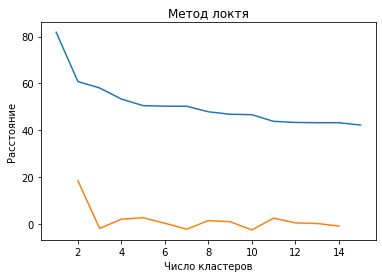

clusters: 2


In [42]:
last = Z[-15:, 2] # в матрице связей берем последние 15 значений расстояний между кластерами
last_rev = last[::-1] #переписываем в обратном порядке
idxs = np.arange(1, len(last) + 1,1) #генерируем список начальное значение 1, конечное --- число элементов массива, шаг 1
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev) #отображение графика

#далее идет расчет вторых разностей
acceleration = np.diff(last, 2) #расчет вторых разностей
acceleration_rev = acceleration[::-1] #переписываем в обратном порядке
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("clusters:", k)

##### в нашем случае это 2 кластеров
##### смотрим разрядность кластеров

In [43]:
label=fcluster(Z, 2, criterion='maxclust')
df_clients_target.loc[:,'claster_ward'] = label # добавление нового столбца с метками


df_clients_target.groupby('claster_ward')\
    .agg(Размерность_кластера = ('claster_ward', 'count'))\
    .reset_index()\
    .sort_values(by = 'Размерность_кластера', ascending=False)

,claster_ward,Размерность_кластера
1,2,1178
0,1,39


### выполним кластеризацию не склонных к отклику

In [44]:
df_clients_target_no = df_clients[df_clients.target == 0]
X = df_clients_target_no.drop(['target'], axis = 1)
scaler = StandardScaler()
df_fit = scaler.fit_transform(X)

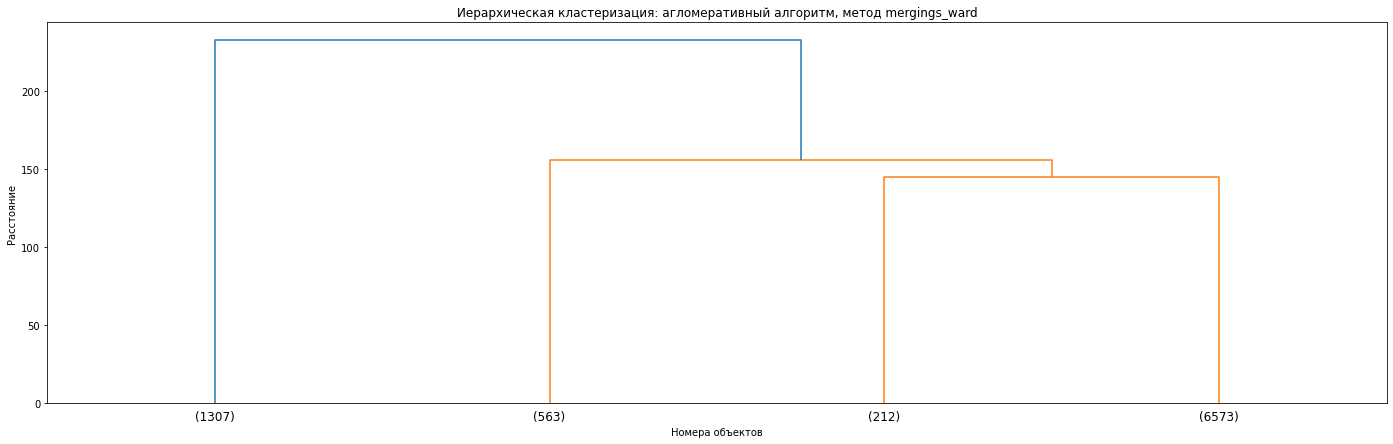

In [45]:
plt.figure(figsize=(24,7))
Z = linkage(df_fit, method='ward') 
dendrogram(Z,
           p = 4,
           truncate_mode = 'lastp',
           leaf_rotation = 0,
           leaf_font_size = 12)
plt.title('Иерархическая кластеризация: агломеративный алгоритм, метод mergings_ward')
plt.ylabel('Расстояние')
plt.xlabel('Номера объектов')
plt.show()

#### и в этом случае это 2 кластеров

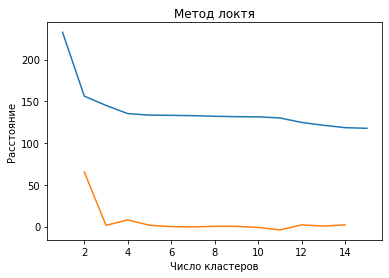

clusters: 2


In [46]:
last = Z[-15:, 2] # в матрице связей берем последние 15 значений расстояний между кластерами
last_rev = last[::-1] #переписываем в обратном порядке
idxs = np.arange(1, len(last) + 1,1) #генерируем список начальное значение 1, конечное --- число элементов массива, шаг 1
plt.xlabel('Число кластеров')
plt.ylabel('Расстояние')
plt.title('Метод локтя')
plt.plot(idxs, last_rev) #отображение графика

acceleration = np.diff(last, 2) #расчет вторых разностей
acceleration_rev = acceleration[::-1] #переписываем в обратном порядке
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("clusters:", k)

In [47]:
label=fcluster(Z, 2, criterion='maxclust')
df_clients_target_no.loc[:,'claster_ward_no'] = label # добавление нового столбца с метками
df_clients_target_no.head()

df_clients_target_no.groupby('claster_ward_no')\
    .agg(Размерность_кластера = ('claster_ward_no', 'count'))\
    .reset_index()\
    .sort_values(by = 'Размерность_кластера', ascending=False)

,claster_ward_no,Размерность_кластера
1,2,7348
0,1,1307


### сравнимаем важные признаки в обеих группах

In [48]:
df_clients_target_no = df_clients_target_no.groupby('claster_ward_no').mean().reset_index().sort_values(by = 'target', ascending = False)
df_clients_target_no[['income', 'work_phone', 'first_pay', 'edu_high', 'age', 'prev_card', 'credit_time', 'credit_close', 'gender']].T

,0,1
income,8503.696396,12949.630512
work_phone,0.225708,0.996189
first_pay,2000.720796,2249.934471
edu_high,0.089518,0.217746
age,54.681714,36.811786
prev_card,0.000000,0.005035
credit_time,7.667942,7.477001
credit_close,0.410099,0.509526
gender,0.809487,0.627518


In [49]:
df_clients_target = df_clients_target.groupby('claster_ward').mean().reset_index().sort_values(by = 'target', ascending = False)
df_clients_target[['income', 'work_phone', 'first_pay', 'edu_high', 'age', 'prev_card', 'credit_time', 'credit_close', 'gender']].T

,0,1
income,9557.692308,14129.016129
work_phone,0.000000,1.000000
first_pay,1238.679487,1875.162470
edu_high,0.000000,0.157046
age,54.410256,35.576401
prev_card,0.000000,0.020374
credit_time,8.153846,8.037351
credit_close,0.282051,0.399830
gender,0.820513,0.614601



## проведем дополнительное исследование признака gender и целевой переменной:
- посмотрим общее соотношение мужчин и женщин
- посмотрим соотношение откликнувшихся и не откликнувшихся
- посмотрим соотношение откликнувшихся и не откликнувшихся среди мужчин и женщин

In [50]:
df_gender = df[['TARGET', 'GENDER']]

In [51]:
print('Женщин {}, это {:.2%} от общего количества.'.
      format (df_gender[df_gender.GENDER == 1].shape[0], df_gender[df_gender.GENDER == 1].shape[0]/df_gender.shape[0]))
print('Мужчин {}, это {:.2%} от общего количества.'.
      format (df_gender[df_gender.GENDER == 0].shape[0], df_gender[df_gender.GENDER == 0].shape[0]/df_gender.shape[0]))
print('------------------------------------------------------------')
print('Отклик {}, это {:.2%} от общего количества.'.
      format (df_gender[df_gender.TARGET == 1].shape[0], df_gender[df_gender.TARGET == 1].shape[0]/df_gender.shape[0]))
print('Не отклик {}, это {:.2%} от общего количества.'.
      format (df_gender[df_gender.TARGET == 0].shape[0], df_gender[df_gender.TARGET == 0].shape[0]/df_gender.shape[0]))
print('------------------------------------------------------------')
print('Отклик {}, это {:.2%} от общего количества женщин.'.
      format (df_gender[((df_gender.TARGET == 1) & (df_gender.GENDER == 1))].shape[0], 
              df_gender[((df_gender.TARGET == 1) & (df_gender.GENDER == 1))].shape[0]/df_gender[df_gender.GENDER == 1].shape[0]))
print('Не отклик {}, это {:.2%} от общего количества женщин.'.
      format (df_gender[((df_gender.TARGET == 0) & (df_gender.GENDER == 1))].shape[0], 
              df_gender[((df_gender.TARGET == 0) & (df_gender.GENDER == 1))].shape[0]/df_gender[df_gender.GENDER == 1].shape[0]))
print('------------------------------------------------------------')
print('Отклик {}, это {:.2%} от общего количества мужчин.'.
      format (df_gender[((df_gender.TARGET == 1) & (df_gender.GENDER == 0))].shape[0], 
              df_gender[((df_gender.TARGET == 1) & (df_gender.GENDER == 0))].shape[0]/df_gender[df_gender.GENDER == 0].shape[0]))
print('Не отклик {}, это {:.2%} от общего количества мужчин.'.
      format (df_gender[((df_gender.TARGET == 0) & (df_gender.GENDER == 0))].shape[0], 
              df_gender[((df_gender.TARGET == 0) & (df_gender.GENDER == 0))].shape[0]/df_gender[df_gender.GENDER == 0].shape[0]))


Женщин 9961, это 65.45% от общего количества.
Мужчин 5258, это 34.55% от общего количества.
------------------------------------------------------------
Отклик 1812, это 11.91% от общего количества.
Не отклик 13407, это 88.09% от общего количества.
------------------------------------------------------------
Отклик 1114, это 11.18% от общего количества женщин.
Не отклик 8847, это 88.82% от общего количества женщин.
------------------------------------------------------------
Отклик 698, это 13.28% от общего количества мужчин.
Не отклик 4560, это 86.72% от общего количества мужчин.


#### Видим, что мужчины чаще откликаюся. Проверим является ли эта разниза статистически значимой.

In [52]:
alpha = 0.05
gen_group_shape = df['GENDER'].value_counts()
goal_group_shape = df.groupby('GENDER')['TARGET'].sum()
p = goal_group_shape / gen_group_shape
p_combined = goal_group_shape.sum() / gen_group_shape.sum()
difference = p[0] - p[1]
z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/gen_group_shape[0] + 1/gen_group_shape[1]))
distr = st.norm(0, 1) 
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('Результаты проверки гипотезы H_0 по z-критерию:')
print('Уровень значимости alpha={:.2f}'.format(alpha))
print('P-value: {:.2f}'.format(p_value))
if p_value < alpha:
    print(f"""Отвергаем нулевую гипотезу: разница в долях 
по признаку <<пол>> статистически значима.""")
else: 
    print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по 
признаку <<пол>> статистически незначима.""")
    print('------------------------------------------------------------')

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях 
по признаку <<пол>> статистически значима.


# Итоговые выводы

### По результатам проведенного исследования получим следующий портрет клиента, склонного к отклику:

- зарабатывает в среднем больше чем не склонный к отклику (доход около 14000)
- Первоначальный взнос меньше (до 1875 руб.)
- не имеет высшего образования
- чуть младше не склонногго к отклику (35 лет)
- уже имел карту и утилизировал
- срок на который берет кредит 8 месяцев
- имеет погашеные кредиты менее 4 штук
- И самое главное: мы проверили гипотезу о статистической значимости признака ПОЛ и выявили, что пол имеет влияние на целевую переменную. А именно МУЖЧИНЫ более склонны к отклику!